In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [ ]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data = data.drop(axis=1, columns=['No', 'X5 latitude', 'X6 longitude'])

In [ ]:
data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [ ]:
data = data.rename(columns = {
          'X1 transaction date': 'Transaction_date',
          'X2 house age': 'House_age',
          'X3 distance to the nearest MRT station': 'Distance_from_MRT_station',
          'X4 number of convenience stores': 'Num_of_store',
          'Y house price of unit area': 'Price_perunit_area'
})

In [ ]:
data.head(20)

,Transaction_date,House_age,Distance_from_MRT_station,Num_of_store,Price_perunit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
5,2012.667,7.1,2175.03000,3,32.1
6,2012.667,34.5,623.47310,7,40.3
7,2013.417,20.3,287.60250,6,46.7
8,2013.500,31.7,5512.03800,1,18.8
9,2013.417,17.9,1783.18000,3,22.1


In [ ]:
date = data['Transaction_date'].apply(lambda x: str(x).split('.'))
data['Transaction_year'] = [int(dt[0]) for dt in date]
data['Transaction_month'] = [int(dt[1]) for dt in date]
data = data.drop('Transaction_date', 1)

data['Transaction_month'] = data['Transaction_month'].apply(lambda x: x*100 if x<10 else x) 
data['Transaction_month'] = data['Transaction_month'].apply(lambda x: x*10 if x<100 else x)

data.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,House_age,Distance_from_MRT_station,Num_of_store,Price_perunit_area,Transaction_year,Transaction_month
0,32.0,84.87882,10,37.9,2012,917
1,19.5,306.59470,9,42.2,2012,917
2,13.3,561.98450,5,47.3,2013,583
3,13.3,561.98450,5,54.8,2013,500
4,5.0,390.56840,5,43.1,2012,833
5,7.1,2175.03000,3,32.1,2012,667
6,34.5,623.47310,7,40.3,2012,667
7,20.3,287.60250,6,46.7,2013,417
8,31.7,5512.03800,1,18.8,2013,500
9,17.9,1783.18000,3,22.1,2013,417


In [ ]:
def convert_quater(month):
  if month <= 250:
        return "Q1"
  elif month <= 500:
        return "Q2"
  elif month <= 750:
        return "Q3"
  elif month <= 1000:
        return "Q4"

data['Transaction_Qtr'] = data['Transaction_month'].apply(convert_quater)
data.head(20)

,House_age,Distance_from_MRT_station,Num_of_store,Price_perunit_area,Transaction_year,Transaction_month,Transaction_Qtr
0,32.0,84.87882,10,37.9,2012,917,Q4
1,19.5,306.59470,9,42.2,2012,917,Q4
2,13.3,561.98450,5,47.3,2013,583,Q3
3,13.3,561.98450,5,54.8,2013,500,Q2
4,5.0,390.56840,5,43.1,2012,833,Q4
5,7.1,2175.03000,3,32.1,2012,667,Q3
6,34.5,623.47310,7,40.3,2012,667,Q3
7,20.3,287.60250,6,46.7,2013,417,Q2
8,31.7,5512.03800,1,18.8,2013,500,Q2
9,17.9,1783.18000,3,22.1,2013,417,Q2


In [ ]:
data.drop(axis=1, columns=['Transaction_month'], inplace=True)

In [ ]:
data.head()

,House_age,Distance_from_MRT_station,Num_of_store,Price_perunit_area,Transaction_year,Transaction_Qtr
0,32.0,84.87882,10,37.9,2012,Q4
1,19.5,306.59470,9,42.2,2012,Q4
2,13.3,561.98450,5,47.3,2013,Q3
3,13.3,561.98450,5,54.8,2013,Q2
4,5.0,390.56840,5,43.1,2012,Q4


In [ ]:
def KDE_plot(data, col):
  plt.figure(figsize=(15,5))
  sns.histplot(data[col], bins=30, kde=True)
  plt.show()


def ScatterPlot(data, xcol, ycol, huecol=None):
  plt.figure(figsize=(15,5))
  sns.scatterplot(data=data, x=xcol, y=ycol, hue=huecol)
  plt.show()


def Line_Plot(data, xcol, ycol):
  plt.figure(figsize=(15,5))
  sns.lineplot(data[xcol], data[ycol])
  plt.show()

def Find_outliers_boxplot(data, cols):
  for column in cols:
    data = data.copy()
    plt.figure(figsize=(10,2))
    sns.set_theme(style="whitegrid")
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

def Remove_outliers(data, col):
  IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
  lower = data[col].quantile(0.25) - (IQR * 1.5)
  upper = data[col].quantile(0.75) + (IQR * 1.5)
  print(f"IQR: {IQR},  lower: {lower},  upper: {upper}")

  data.loc[data[col]>=upper, col]=upper
  data.loc[data[col]<=lower, col]=lower 

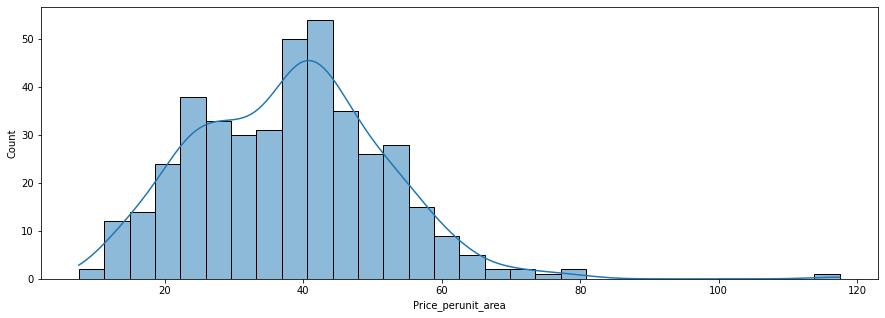

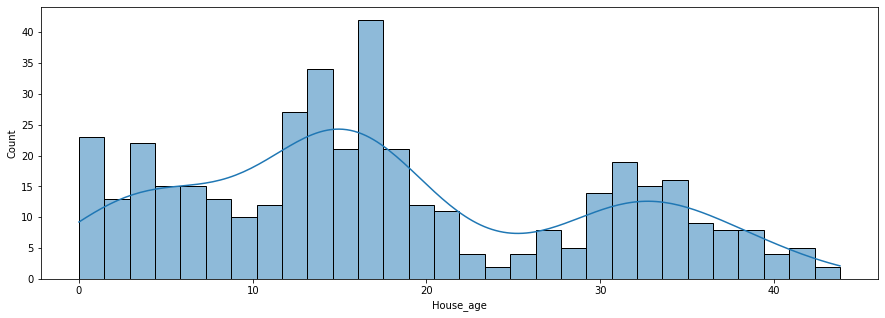

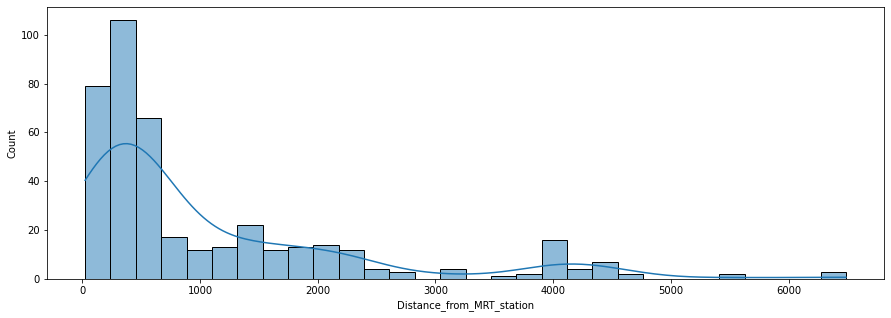

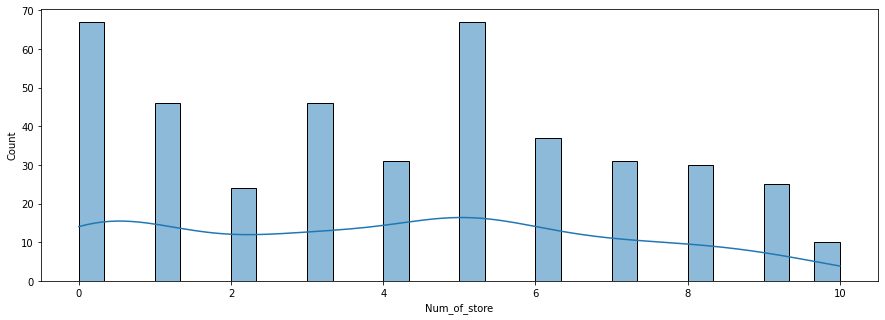

In [ ]:
KDE_plot(data, 'Price_perunit_area')
KDE_plot(data, 'House_age')
KDE_plot(data, 'Distance_from_MRT_station')
KDE_plot(data, 'Num_of_store')

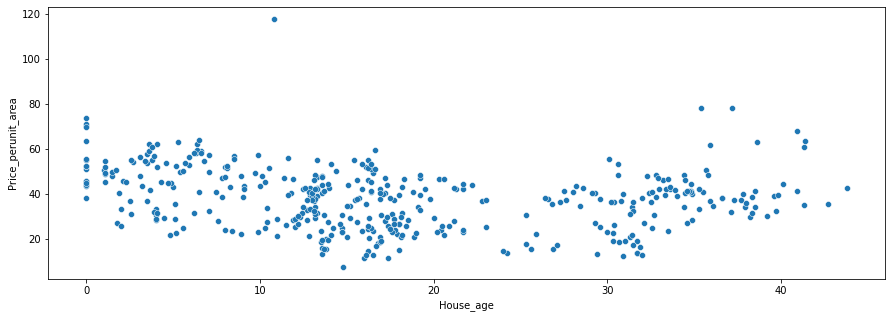

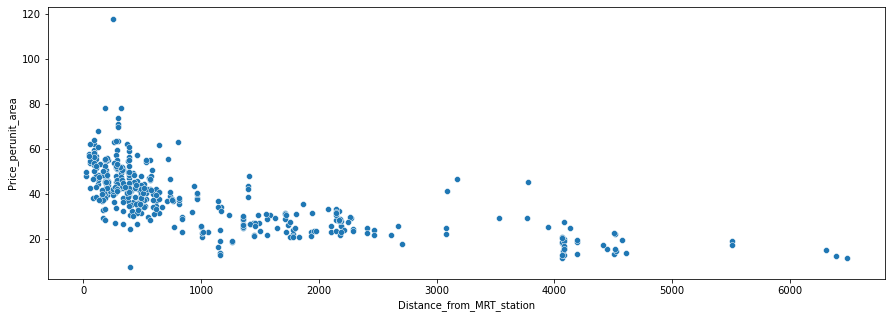

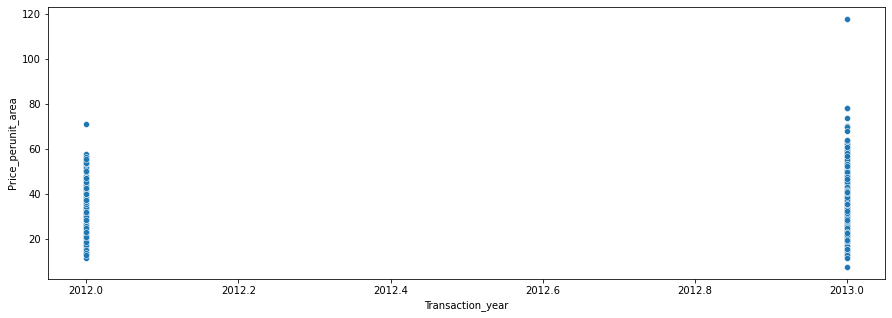

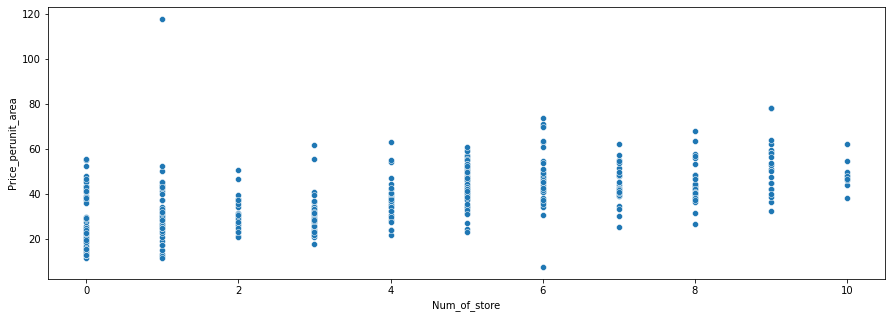

In [ ]:
ScatterPlot(data, 'House_age', 'Price_perunit_area')
ScatterPlot(data, 'Distance_from_MRT_station', 'Price_perunit_area')
ScatterPlot(data, 'Transaction_year', 'Price_perunit_area')
ScatterPlot(data, 'Num_of_store', 'Price_perunit_area')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


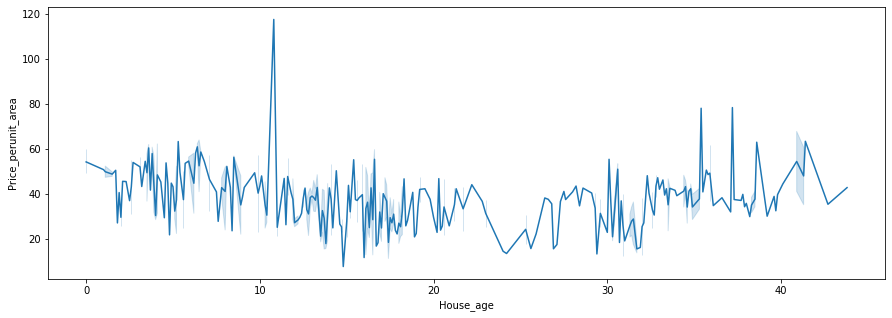

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


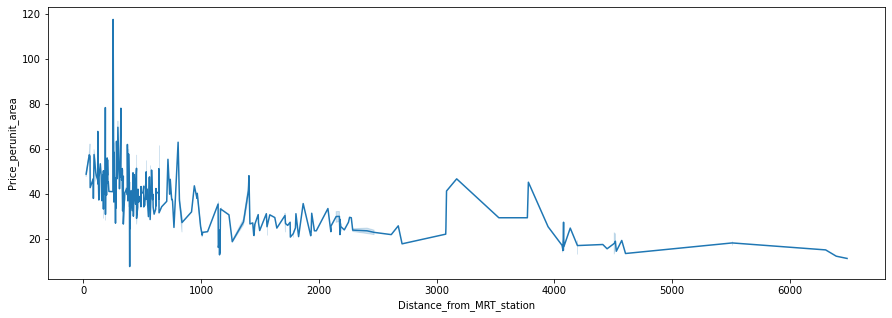

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


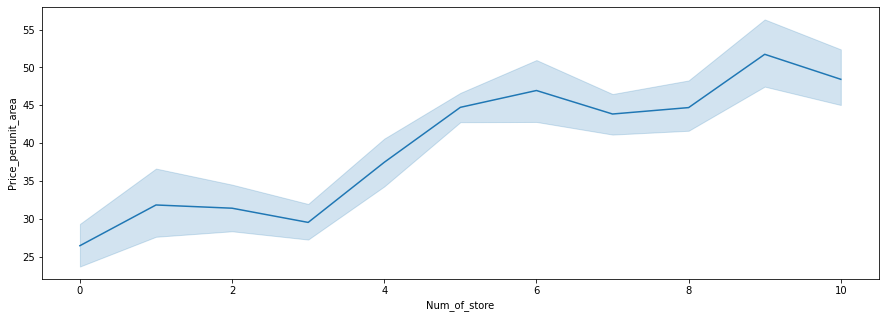

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


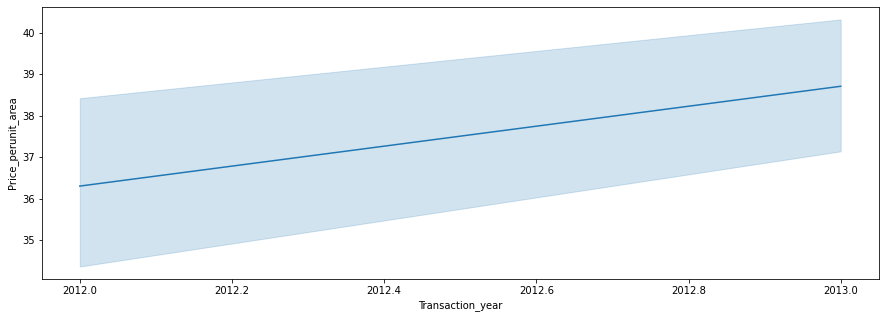

In [ ]:
Line_Plot(data, 'House_age', 'Price_perunit_area')
Line_Plot(data, 'Distance_from_MRT_station', 'Price_perunit_area')
Line_Plot(data, 'Num_of_store', 'Price_perunit_area')
Line_Plot(data, 'Transaction_year', 'Price_perunit_area')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


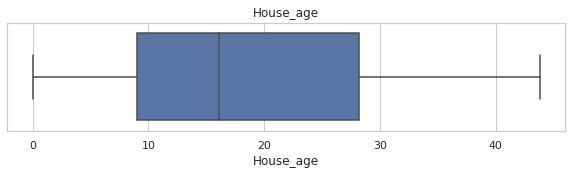

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


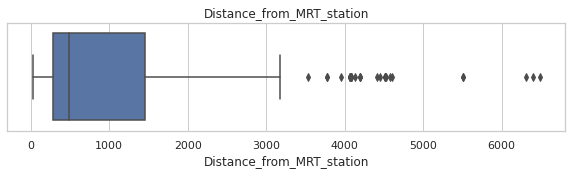

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


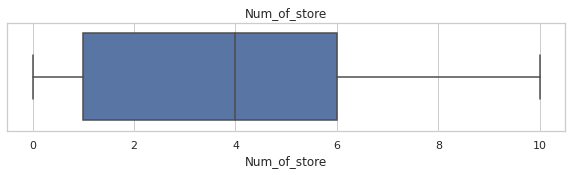

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


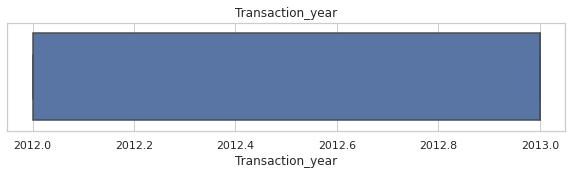

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


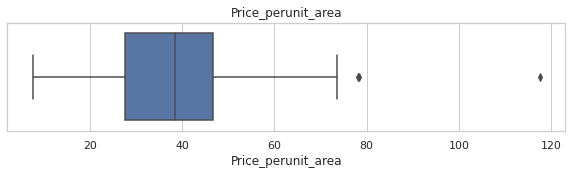

In [ ]:
Find_outliers_boxplot(data, ['House_age', 'Distance_from_MRT_station', 'Num_of_store', 'Transaction_year', 'Price_perunit_area'])

IQR: 1164.9542000000001,  lower: -1458.1065000000003,  upper: 3201.7103
IQR: 18.900000000000002,  lower: -0.6500000000000021,  upper: 74.95


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


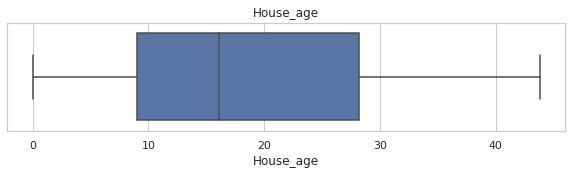

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


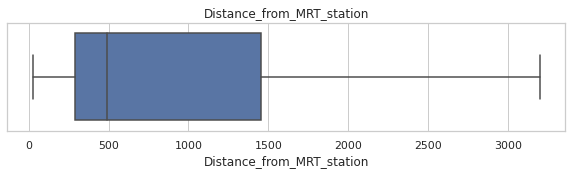

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


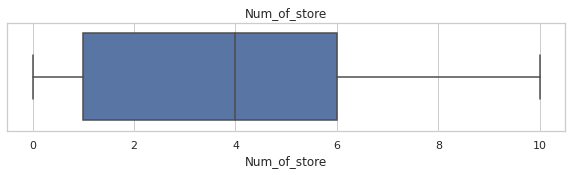

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


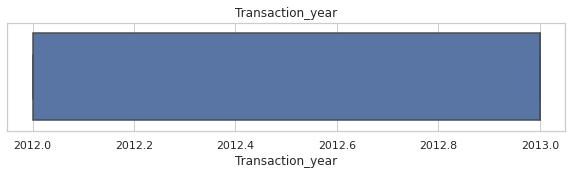

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


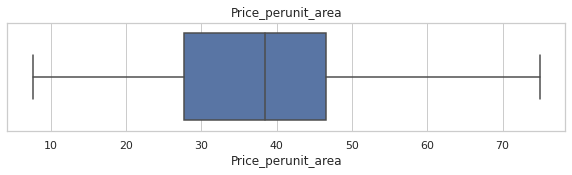

In [ ]:
# Remove the outliers:
Remove_outliers(data, 'Distance_from_MRT_station')
Remove_outliers(data, 'Price_perunit_area')

# After removing outliers to check:
Find_outliers_boxplot(data, ['House_age', 'Distance_from_MRT_station', 'Num_of_store', 'Transaction_year', 'Price_perunit_area'])

Index(['House_age', 'Distance_from_MRT_station', 'Num_of_store',
       'Price_perunit_area', 'Transaction_year', 'Transaction_Qtr'],
      dtype='object')

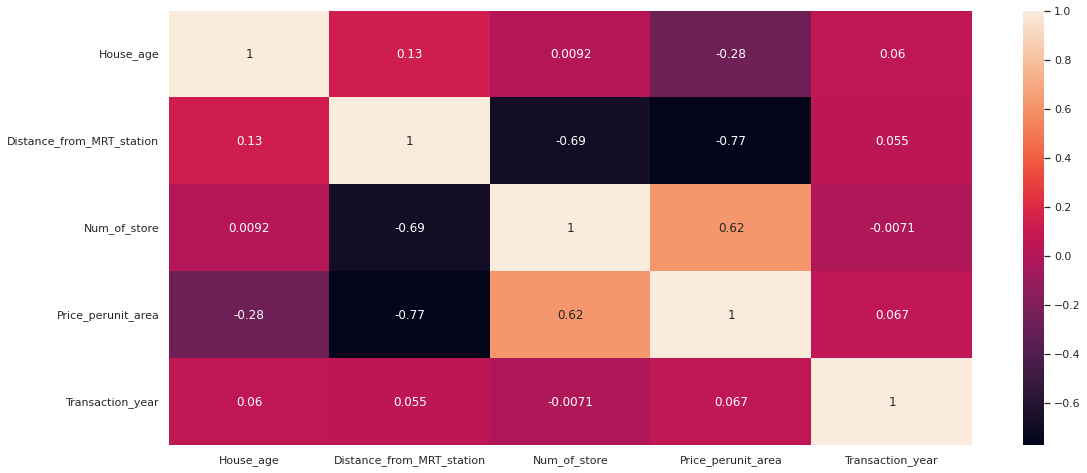

In [ ]:
# Check the multicollinearity factor using spearman correlation:

corr = data.corr(method='spearman')
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True)
data.columns

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,House_age,Distance_from_MRT_station,Num_of_store,Price_perunit_area,Transaction_year,Transaction_Qtr_Q2,Transaction_Qtr_Q3,Transaction_Qtr_Q4
0,32.0,84.87882,10,37.9,2012,0,0,1
1,19.5,306.59470,9,42.2,2012,0,0,1
2,13.3,561.98450,5,47.3,2013,0,1,0
3,13.3,561.98450,5,54.8,2013,1,0,0
4,5.0,390.56840,5,43.1,2012,0,0,1


In [ ]:
X = data.drop('Price_perunit_area', 1)
Y = data['Price_perunit_area']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=125)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# **1. Linear Regression:**

In [ ]:
# Apply linear regression without scaling:

regression = LinearRegression()
regression.fit(x_train, y_train)

y_predict_test = regression.predict(x_test)
y_predict_train = regression.predict(x_train)

print("Accuracy based on Test Data: ", r2_score(y_test, y_predict_test))
print("Accuracy based on Test Data: ", r2_score(y_train, y_predict_train))
before_scaling = r2_score(y_test, y_predict_test)

Accuracy based on Test Data:  0.6288029517798677
Accuracy based on Test Data:  0.6083894295442976


In [ ]:
# Apply linear regression after scaling

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

newRegression = LinearRegression()
newRegression.fit(x_train_scaled, y_train)

y_predict_test = newRegression.predict(x_test_scaled)
y_predict_train = newRegression.predict(x_train_scaled)


print("Accuracy based on Test Data: ", r2_score(y_test, y_predict_test))
print("Accuracy based on Test Data: ", r2_score(y_train, y_predict_train))
after_scaling = r2_score(y_test, y_predict_test)

Accuracy based on Test Data:  0.6288029517798679
Accuracy based on Test Data:  0.6083894295442982


# **2. Ridge Regression:**

In [ ]:
# Apply Ridge regression:

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize = True)
ridgecv.fit(x_train_scaled, y_train)

In [ ]:
ridgecv.alpha_

0.05886427145100681

In [ ]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train_scaled, y_train)

y_predict_test = ridge_model.predict(x_test_scaled)
y_predict_train = ridge_model.predict(x_train_scaled)


print("Accuracy based on Test Data: ", r2_score(y_test, y_predict_test))
print("Accuracy based on Test Data: ", r2_score(y_train, y_predict_train))
ridge_reg = r2_score(y_test, y_predict_test)

Accuracy based on Test Data:  0.6287913555802032
Accuracy based on Test Data:  0.6083894059536779


# **3. Lasso Regression:**

In [ ]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

lasso_reg = Lasso(lasscv.alpha_)
lasso_reg.fit(x_train, y_train)

y_predict_test = lasso_reg.predict(x_test)
y_predict_train = lasso_reg.predict(x_train)



print("Accuracy based on Test Data: ", r2_score(y_test, y_predict_test))
print("Accuracy based on Test Data: ", r2_score(y_train, y_predict_train))
lasso_reg = r2_score(y_test, y_predict_test)

Accuracy based on Test Data:  0.6278063390430279
Accuracy based on Test Data:  0.6083604466627135


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


# **Final Result/ Score:**

In [ ]:
cols = ['before_scaling_LinearRegression', 'after_scaling_LinearRegression', 'RidgeRegression', 'LassoRegression']
score = pd.DataFrame([before_scaling, after_scaling, ridge_reg, lasso_reg], index=cols, columns=['Score'])
score

,Score
before_scaling_LinearRegression,0.628803
after_scaling_LinearRegression,0.628803
RidgeRegression,0.628791
LassoRegression,0.627806
